<a href="https://colab.research.google.com/github/LeninKhangjrakpam/Plant-Disease-Classification-CS475P-/blob/main/Prototype_of_Crop_disease_mobilenetV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Command Line to activate local  Jupyter runtime
```cmd
jupyter notebook --no-browser --NotebookApp.allow_origin='https://colab.research.google.com' --port=8888 --NotebookApp.port_retries=0
```

Command Line to check available GPU
```cmd
!nvidia-smi --query-gpu=name,memory.total,memory.free --format=csv,noheader
```

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
# Mount Google Drive for saving models
drive_mounted = False
from google.colab import drive
drive.mount('/content/drive')
drive_mounted = True

Mounted at /content/drive


In [ ]:
if not drive_mounted:
  print("All your dataset, model will be saved in each runtime session and not permanently")

# Download Dataset
- `plant_village`  dataset

In [ ]:
dataset_location = "/content/drive/MyDrive/datatset"
if not os.path.isdir(dataset_location):
  print(f"Creating Directory: {dataset_location}")
  os.mkdir(dataset_location)

In [ ]:
# Divide datatset into following percent
# Train_set = 80%, Validation_set = 10%, test_set = 10%

full_ds, metadata = tfds.load(
    "plant_village",
    split="all",
    with_info=True,
    as_supervised=True,
    shuffle_files=True,
    data_dir=dataset_location if drive_mounted else None
)

# Analyse Download Dataset

In [ ]:
print(f"Number of classes: {metadata.features['label'].num_classes}")

image, label = next(iter(full_ds))
print(f"Image Shape: {image.shape}")
print(f"Image Label: {metadata.features['label'].int2str(label)}\n")

print(f"Total Image Files: {len(full_ds)}")

Number of classes: 38
Image Shape: (256, 256, 3)
Image Label: Tomato___Septoria_leaf_spot

Total Image Files: 54303


In [ ]:
# List Classes Present in Full Datasets
class_name_list = metadata.features['label'].names
for class_no, class_name in enumerate(class_name_list):
  print(f"{class_no} : {class_name}")

0 : Apple___Apple_scab
1 : Apple___Black_rot
2 : Apple___Cedar_apple_rust
3 : Apple___healthy
4 : Blueberry___healthy
5 : Cherry___healthy
6 : Cherry___Powdery_mildew
7 : Corn___Cercospora_leaf_spot Gray_leaf_spot
8 : Corn___Common_rust
9 : Corn___healthy
10 : Corn___Northern_Leaf_Blight
11 : Grape___Black_rot
12 : Grape___Esca_(Black_Measles)
13 : Grape___healthy
14 : Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
15 : Orange___Haunglongbing_(Citrus_greening)
16 : Peach___Bacterial_spot
17 : Peach___healthy
18 : Pepper,_bell___Bacterial_spot
19 : Pepper,_bell___healthy
20 : Potato___Early_blight
21 : Potato___healthy
22 : Potato___Late_blight
23 : Raspberry___healthy
24 : Soybean___healthy
25 : Squash___Powdery_mildew
26 : Strawberry___healthy
27 : Strawberry___Leaf_scorch
28 : Tomato___Bacterial_spot
29 : Tomato___Early_blight
30 : Tomato___healthy
31 : Tomato___Late_blight
32 : Tomato___Leaf_Mold
33 : Tomato___Septoria_leaf_spot
34 : Tomato___Spider_mites Two-spotted_spider_mite
35 : To

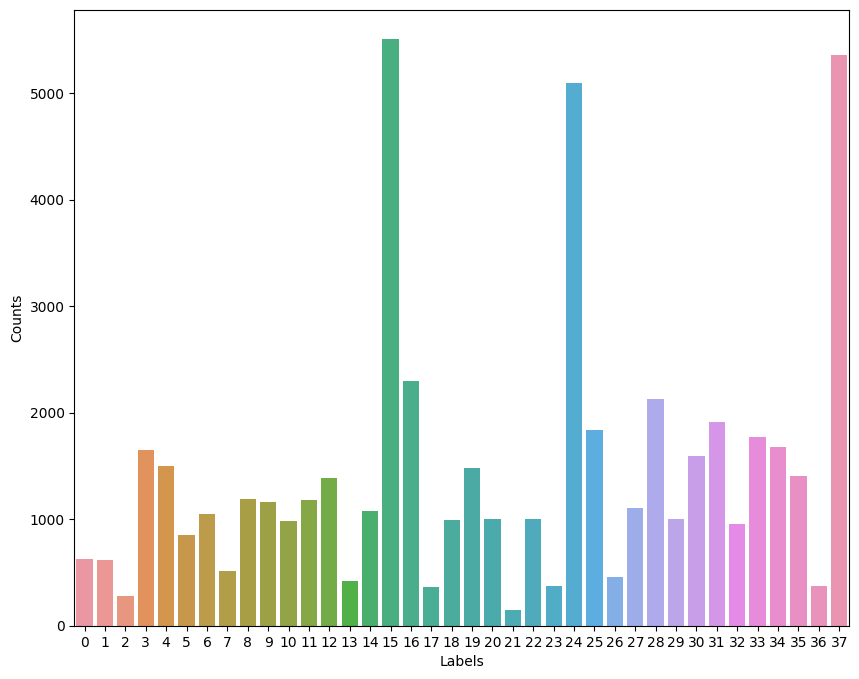

In [ ]:
plt.figure(figsize=(10, 8))
labels, counts = np.unique(np.fromiter(full_ds.map(lambda x, y: y), np.int32),
                       return_counts=True)

plt.ylabel('Counts')
plt.xlabel('Labels')
_ = sns.barplot(x=labels, y = counts)

# Filter Dataset to include only 11 classes

In [ ]:
full_ds = full_ds.filter(lambda image, label: label < 11)
# print(type(full_ds))
# print(full_ds)

class_name_list = [class_name_list[i] for i in range(11)]
class_num = len(class_name_list)

print("After Filtered:")
print(f"Total Classes Number: {class_num}")
for class_label, class_name in enumerate(class_name_list):
  print(f"{class_label} : {class_name}")

After Filtered:
Total Classes Number: 11
0 : Apple___Apple_scab
1 : Apple___Black_rot
2 : Apple___Cedar_apple_rust
3 : Apple___healthy
4 : Blueberry___healthy
5 : Cherry___healthy
6 : Cherry___Powdery_mildew
7 : Corn___Cercospora_leaf_spot Gray_leaf_spot
8 : Corn___Common_rust
9 : Corn___healthy
10 : Corn___Northern_Leaf_Blight


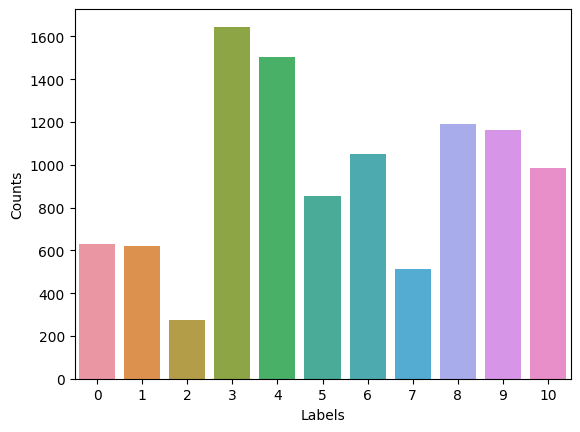

In [ ]:
labels, counts = np.unique(np.fromiter(full_ds.map(lambda x, y: y), np.int32),
                       return_counts=True)

plt.ylabel('Counts')
plt.xlabel('Labels')
_ = sns.barplot(x=labels, y = counts)

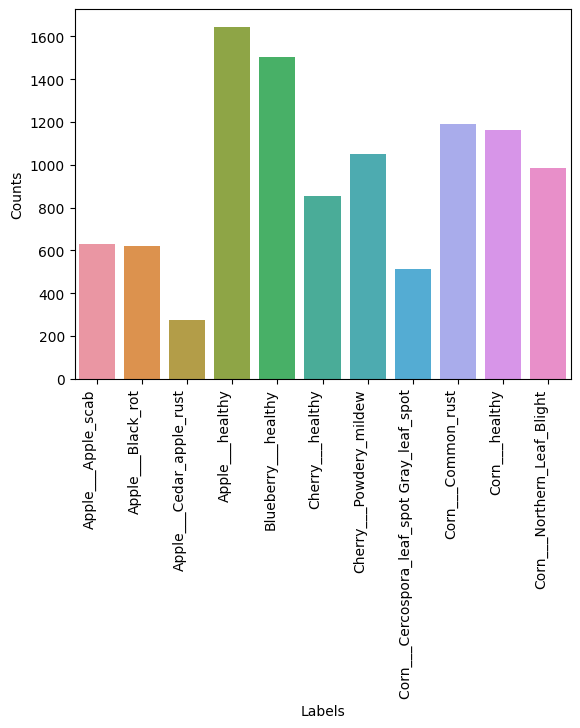

In [ ]:
plt.ylabel('Counts')
plt.xlabel('Labels')
ax = sns.barplot(x = class_name_list, y = counts)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

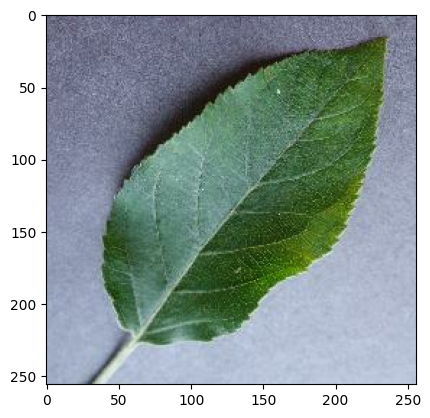

In [ ]:
# tf.data.experimental.cardinality(full_ds)
img, label = next(iter(full_ds))
_ = plt.imshow(img)
plt.show()

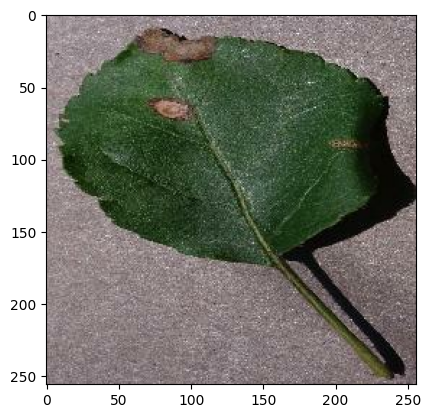

In [ ]:
img, label = next(iter(full_ds.take(1)))
_ = plt.imshow(img)

# Split Training, Validation and Testing Set
Split according to `train: 80%, test: 10%, validation: 10%`

Try K fold Cross Validation (K = 10)

In [ ]:
# full_ds_samples =  len(list(full_ds))
full_ds_samples_count = 10431

train_ds_count = int(full_ds_samples_count * 0.8)
valid_ds_count = int(full_ds_samples_count * 0.1)
test_ds_count = int(full_ds_samples_count * 0.1)

train_ds = full_ds.take(train_ds_count)
valid_ds = full_ds.skip(train_ds_count).take(valid_ds_count)
test_ds = full_ds.skip(train_ds_count + valid_ds_count)

In [ ]:
print(full_ds.reduce(0, lambda x, _ : x + 1).numpy())

print(train_ds.reduce(0, lambda x, _ : x + 1).numpy())
print(test_ds.reduce(0, lambda x, _ : x + 1).numpy())
print(valid_ds.reduce(0, lambda x, _ : x + 1).numpy())

10431
8344
1044
1043


# Data Exploration

In [ ]:
# Check whether sample count for train, val and test match as expected

print(f"Train: {train_ds_count} == {train_ds.reduce(0, lambda x, _ : x + 1).numpy()}")
print(f"Test: {test_ds_count} == {test_ds.reduce(0, lambda x, _ : x + 1).numpy()}")
print(f"Validation: {valid_ds_count} == {valid_ds.reduce(0, lambda x, _ : x + 1).numpy()}")

Train: 8344 == 8344
Test: 1043 == 1044
Validation: 1043 == 1043


In [ ]:
print(train_ds_count / full_ds_samples_count * 100,
      test_ds_count / full_ds_samples_count * 100,
      valid_ds_count / full_ds_samples_count * 100
      )

79.99233055315885 9.999041319144856 9.999041319144856


## Class Distribution

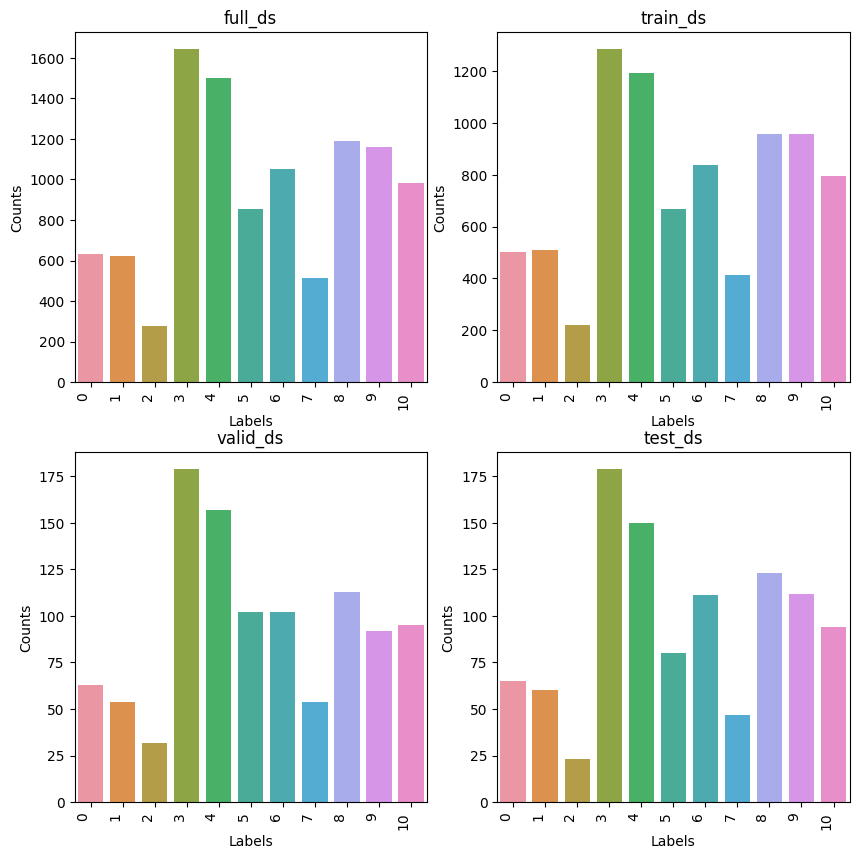

In [ ]:
plt.figure(figsize=(10, 10))

ds_dict = {"full_ds": full_ds, "train_ds": train_ds, "valid_ds": valid_ds, "test_ds": test_ds}
for indx, ds in enumerate(ds_dict):
  plt.subplot(2, 2, indx + 1)
  labels, counts = np.unique(np.fromiter(ds_dict[ds].map(lambda x, y: y), np.int32),
                       return_counts=True)

  plt.ylabel('Counts')
  plt.xlabel('Labels')
  plt.title(ds)
  ax = sns.barplot(x = labels, y = counts)
  _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

In [ ]:
class_name_list

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry___healthy',
 'Cherry___Powdery_mildew',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn___Common_rust',
 'Corn___healthy',
 'Corn___Northern_Leaf_Blight']

## Data Visualization

In [ ]:
# TODO: Plot examples instance of samples belonging to each class

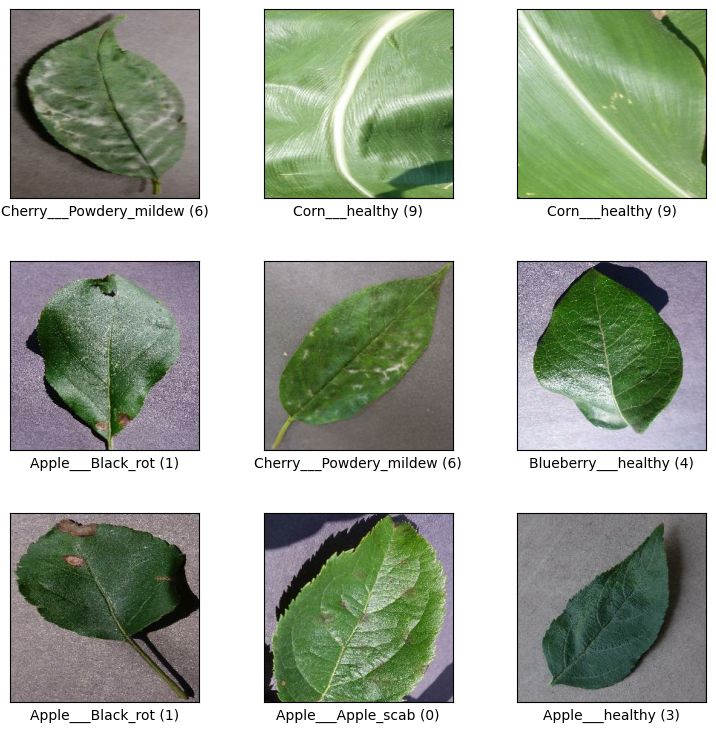

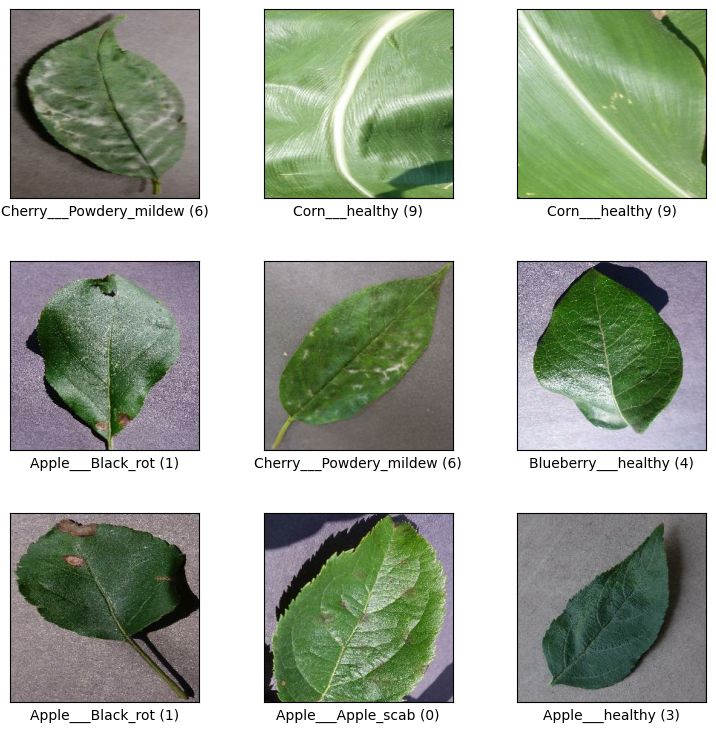

In [ ]:
tfds.show_examples(train_ds, metadata)

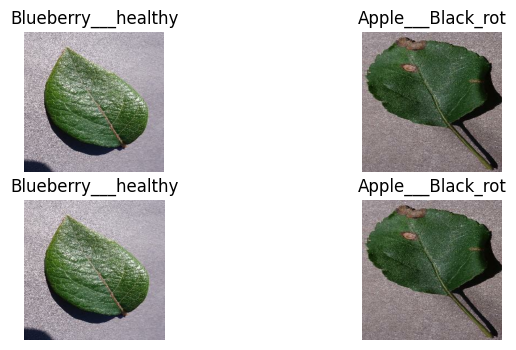

In [ ]:
plt.figure(figsize=(8, 4))
for i in range(4):
  image, label = next(iter(train_ds))
  ax = plt.subplot(2, 2, i + 1)
  plt.imshow(image)
  plt.title(metadata.features['label'].int2str(label))
  plt.axis("off")

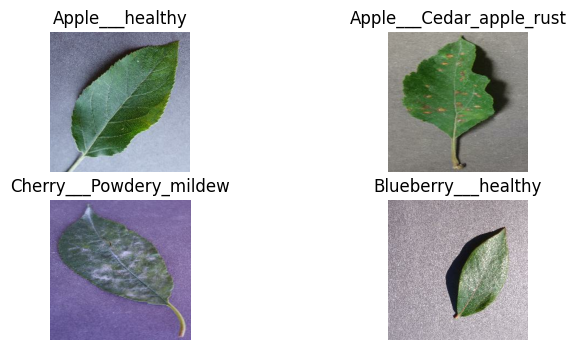

In [ ]:
plt.figure(figsize=(8, 4))
for i, (image, label) in enumerate(train_ds.take(4)):
  _ = plt.subplot(2, 2, i + 1)
  plt.imshow(image)
  plt.title(metadata.features['label'].int2str(label.numpy()))
  plt.axis("off")

image  label
0  [[[156, 145, 149], [172, 161, 165], [135, 124,...      1
1  [[[38, 41, 60], [39, 42, 61], [40, 43, 62], [4...      0
2  [[[129, 127, 130], [127, 125, 128], [127, 125,...      3
3  [[[181, 167, 166], [181, 167, 166], [176, 162,...      5
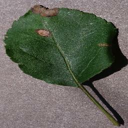
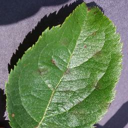
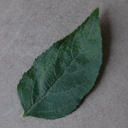
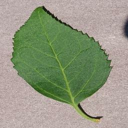

In [ ]:
tfds.as_dataframe(train_ds.take(4), metadata)

# Preprocessing Data


In [ ]:
print(tf.data.experimental.cardinality(valid_ds))

tf.Tensor(-2, shape=(), dtype=int64)


In [ ]:
# next(iter(train_ds))
img = next(iter(train_ds.take(1)))[0]
print(img.shape)
print(tf.expand_dims(img, 0).shape)

(256, 256, 3)
(1, 256, 256, 3)


## Define Rescale Layer
We need a Rescale Layer as `mobilenetv2` only take image pixel in range of `[-1, 1]`

In [ ]:
IMG_SIZE = (256, 256)

In [ ]:
# Define Resize, Rescale Layer
resize_rescale = tf.keras.Sequential([
    # tf.keras.layers.Resizing(160, 160),
    tf.keras.layers.Rescaling(1./127.5, offset=-1)
])

(-0.5, 255.5, 255.5, -0.5)

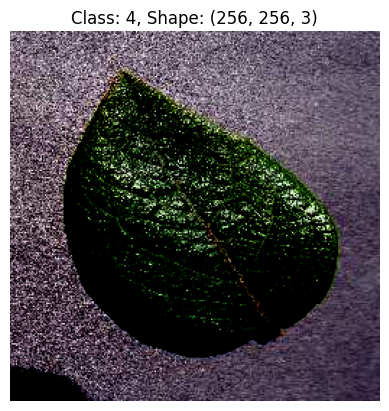

In [ ]:
img, label = next(iter(train_ds.take(1)))
r_img = resize_rescale(img)

plt.imshow(r_img)
plt.title(f"Class: {label.numpy()}, Shape: {r_img.shape}")
plt.axis('off')

In [ ]:
print(f"Old and New image Shape: {img.shape, r_img.shape}")
print(f"Min and Max pixel Values: {r_img.numpy().min(), r_img.numpy().max()}")

Old and New image Shape: (TensorShape([256, 256, 3]), TensorShape([256, 256, 3]))
Min and Max pixel Values: (-1.0, 1.0)


### MobileNetV2 Preprocessing Input

In [ ]:
# Rescaling pixel value from [0, 255] to [-1, 1]
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

(-0.5, 255.5, 255.5, -0.5)

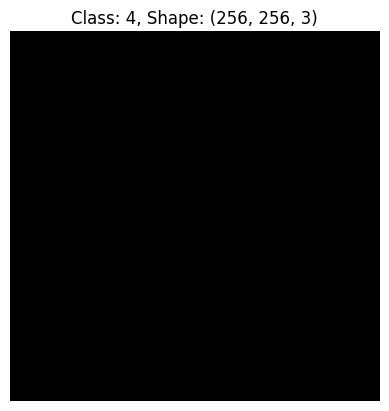

In [ ]:
# img, label = next(iter(train_ds.take(1)))
r_img = preprocess_input(
    tf.image.convert_image_dtype(img, dtype=tf.float32)
)

plt.imshow(r_img)
plt.title(f"Class: {label.numpy()}, Shape: {r_img.shape}")
plt.axis('off')

In [ ]:
print(f"Old and New image Shape: {img.shape, r_img.shape}")
print(f"Min and Max pixel Values: {r_img.numpy().min(), r_img.numpy().max()}")

Old and New image Shape: (TensorShape([256, 256, 3]), TensorShape([256, 256, 3]))
Min and Max pixel Values: (-1.0, -0.99215686)


## Data Augmentation Layer
Add `RandomFlip` and `RandomRotation`\
Do we need more augmentation like `Contrast, Brightess`?


In [ ]:
# Define Data Augmentation Layer
data_aug = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2)
])

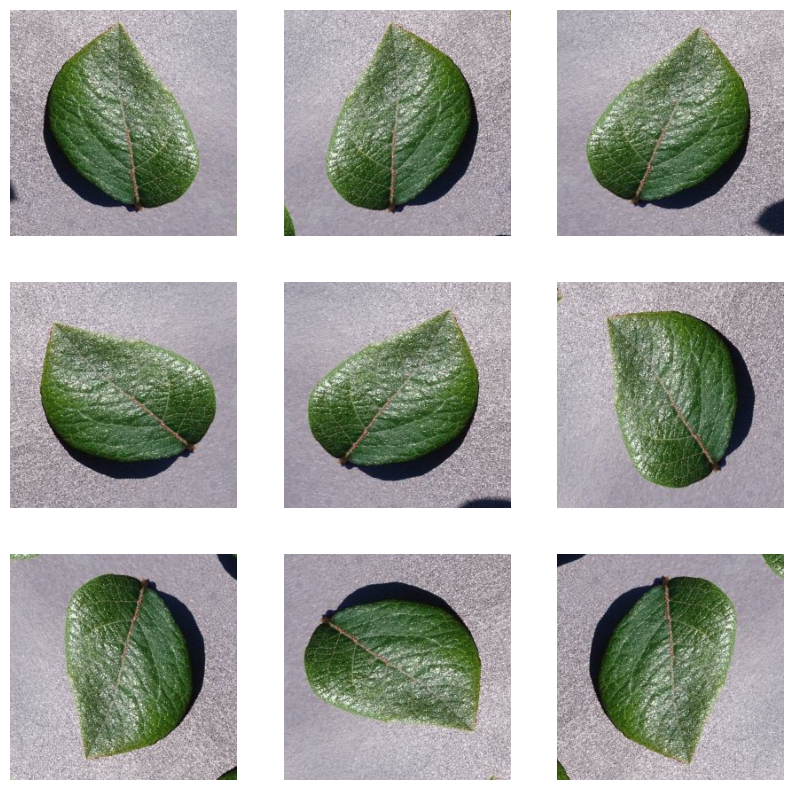

In [ ]:
# img, label = next(iter(train_ds.take(1)))

plt.figure(figsize=(10, 10))
for i in range(9):
  plt.subplot(3, 3, i + 1)
  aug_img = data_aug(img)
  plt.imshow(aug_img/255)
  plt.axis('off')

## Batch Dataset
- BATCH_SIZE: `16`

In [ ]:
# Prepare Dataset for training
# - Perform Data Batches, Data Augmentation

BATCH_SIZE = 16
AUTOTUNE = tf.data.AUTOTUNE

def prepare(ds, resize=False, shuffle=False, augment=False):
  # Batch all Dataset
  ds = ds.batch(BATCH_SIZE)

  if shuffle:
    ds = ds.shuffle(1000)

  # Resize and Rescale
  if resize:
    ds = ds.map(lambda x, y: (resize_rescale(x), y), num_parallel_calls=AUTOTUNE)

  if augment:
    ds = ds.map(lambda x, y: (data_aug(x, training=True), y), num_parallel_calls=AUTOTUNE)

  # Use Buffered Prefetching in all Dataset
  return ds.prefetch(buffer_size=AUTOTUNE)

In [ ]:
train_ds = prepare(train_ds, shuffle=True)
test_ds = prepare(test_ds)
valid_ds = prepare(valid_ds)

In [ ]:
train_batches = tf.data.experimental.cardinality(train_ds).numpy()
valid_batches = tf.data.experimental.cardinality(valid_ds).numpy()
test_batches = tf.data.experimental.cardinality(test_ds).numpy()

print(f"Number of Train, Validation and Test Batches: {train_batches, valid_batches, test_batches}")

Number of Train, Validation and Test Batches: (-2, -2, -2)


In [ ]:
train_ds_batch_no = train_ds.reduce(0, lambda x, _ : x + 1).numpy()
test_ds_batch_no = test_ds.reduce(0, lambda x, _ : x + 1).numpy()
valid_ds_batch_no = valid_ds.reduce(0, lambda x, _ : x + 1).numpy()

print(f"No of train batches: {train_ds_batch_no}")
print(f"No of test batches: {test_ds_batch_no}")
print(f"No of valid batches: {valid_ds_batch_no}")

No of train batches: 522
No of test batches: 66
No of valid batches: 66


In [ ]:
# # Rescale Pixel Value
# img, label = next(iter(train_ds.take(1)))
# # Pixel Value before Rescaling
# print(img.numpy().min(), img.numpy().max())

# # Pixel Value after Rescaling
# img = preprocess_input(img.numpy().astype(float))
# print(img.min(), img.max())

# Create the base model from the pre-trained convnets
- BaseModel: `PretrainedMobileNetV2`
- Pretrained Weights: `ImageNet`

## Download Base Model

In [ ]:
# Create Base Model

IMG_SHAPE = IMG_SIZE + (3,)

base_model = tf.keras.applications.MobileNetV2(
    input_shape=(256, 256, 3),
    include_top=False,
    weights="imagenet"
    )

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
# # Base Model (MobileNetV2) take 160x160x3 and gives 5x5x1280 block of features
img_batch, label_batch = next(iter(train_ds))

feature_batch = base_model(resize_rescale(img_batch))

print(feature_batch.shape)

(16, 8, 8, 1280)


In [ ]:
type(img_batch)

tensorflow.python.framework.ops.EagerTensor

## Modify Base Model
Add Classification Head to `Base Model`

In [ ]:
# MobileNetV2
# Before Freezing Weights:
# Total params: 2257984 (8.61 MB)
# Trainable params: 2223872 (8.48 MB)
# Non-trainable params: 34112 (133.25 KB)
# =====================================================
# After Freezing Weights:
# Total params: 2257984 (8.61 MB)
# Trainable params: 0 (0.00 Byte)
# Non-trainable params: 2257984 (8.61 MB)

base_model.trainable = False

In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 128, 128, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 128, 128, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 128, 128, 32)         0         ['bn_Conv1[

In [ ]:
# Convert (batch_size, 5, 5, 1280) ==> (batch_size, 1280) features map
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

feature_batch_avg = global_average_layer(feature_batch)
print(feature_batch_avg.shape)

(16, 1280)


In [ ]:
# Convert (batch_size, 1280) features to classifier output i.e. (batch_size, class_no)
prediction_layer = tf.keras.layers.Dense(class_num, activation=tf.keras.activations.softmax)

prediction_batch = prediction_layer(feature_batch_avg)
print(prediction_batch.shape)

(16, 11)


## Build Model

In [ ]:
# # Test Model
# t = tf.keras.Sequential([
#     tf.keras.Input(shape=(256, 256, 3)),
#     data_aug,
#     preprocess_input,
#     base_model,
#     global_average_layer,
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(class_num, activation=tf.keras.activations.softmax)
# ])
# t.summary()

# Build Model by chaining together img resize_rescale, data augmentation, base_model and feature extractor layers

inputs = tf.keras.Input(shape=(256, 256, 3))
x = data_aug(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)

model = tf.keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (256, 256, 3)             0         
                                                                 
 tf.math.truediv (TFOpLambd  (None, 256, 256, 3)       0         
 a)                                                              
                                                                 
 tf.math.subtract (TFOpLamb  (None, 256, 256, 3)       0         
 da)                                                             
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 8, 8, 1280)        2257984   
 tional)                                                         
                                                             

In [ ]:
len(model.trainable_variables)

2

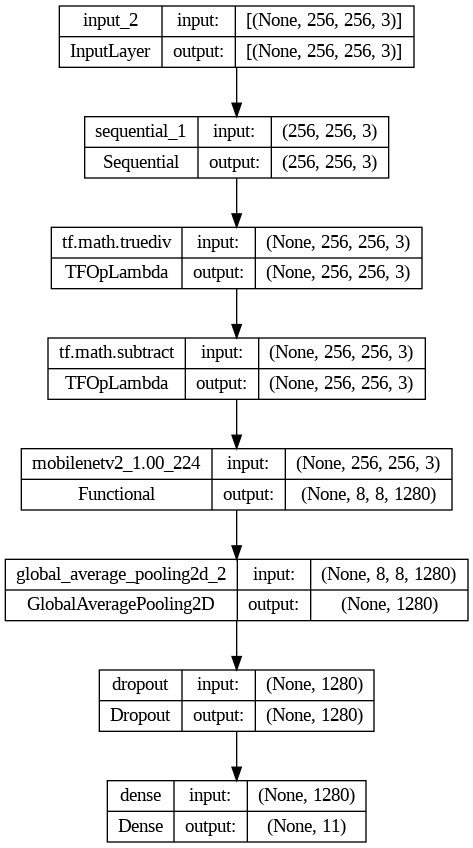

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# Compile Model

base_learning_rate = 1e-4

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Transfer Learning

In [ ]:
# Evaluate Model before Training

loss0, acc0 = model.evaluate(valid_ds)
print(f"Validation Data:\nInitial Loss: {loss0}\nInitial Accuracy: {acc0}")

loss0, acc0 = model.evaluate(test_ds)
print(f"Testing Dataset:\nInitial Loss: {loss0}\nInitial Accuracy: {acc0}")

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


66/66 [==============================] - 33s 48ms/step - loss: 2.5379 - accuracy: 0.1755
Validation Data:
Initial Loss: 2.537855625152588
Initial Accuracy: 0.17545542120933533
66/66 [==============================] - 22s 47ms/step - loss: 2.5420 - accuracy: 0.1360
Testing Dataset:
Initial Loss: 2.5419516563415527
Initial Accuracy: 0.13601532578468323


## Train the Model

In [ ]:
# Train Model
init_epochs = 10

history = model.fit(
    train_ds, validation_data=valid_ds, epochs=init_epochs,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3, mode="auto")
    ]
)

Epoch 1/10
522/522 [==============================] - 59s 69ms/step - loss: 1.3039 - accuracy: 0.5983 - val_loss: 0.7857 - val_accuracy: 0.8082
Epoch 2/10
522/522 [==============================] - 54s 69ms/step - loss: 0.5472 - accuracy: 0.8691 - val_loss: 0.4694 - val_accuracy: 0.8993
Epoch 3/10
522/522 [==============================] - 52s 66ms/step - loss: 0.3527 - accuracy: 0.9205 - val_loss: 0.3548 - val_accuracy: 0.9243
Epoch 4/10
522/522 [==============================] - 53s 68ms/step - loss: 0.2756 - accuracy: 0.9308 - val_loss: 0.2852 - val_accuracy: 0.9338
Epoch 5/10
522/522 [==============================] - 54s 68ms/step - loss: 0.2275 - accuracy: 0.9402 - val_loss: 0.2394 - val_accuracy: 0.9434
Epoch 6/10
522/522 [==============================] - 53s 68ms/step - loss: 0.1904 - accuracy: 0.9494 - val_loss: 0.2144 - val_accuracy: 0.9453
Epoch 7/10
522/522 [==============================] - 53s 68ms/step - loss: 0.1747 - accuracy: 0.9519 - val_loss: 0.1922 - val_accuracy:

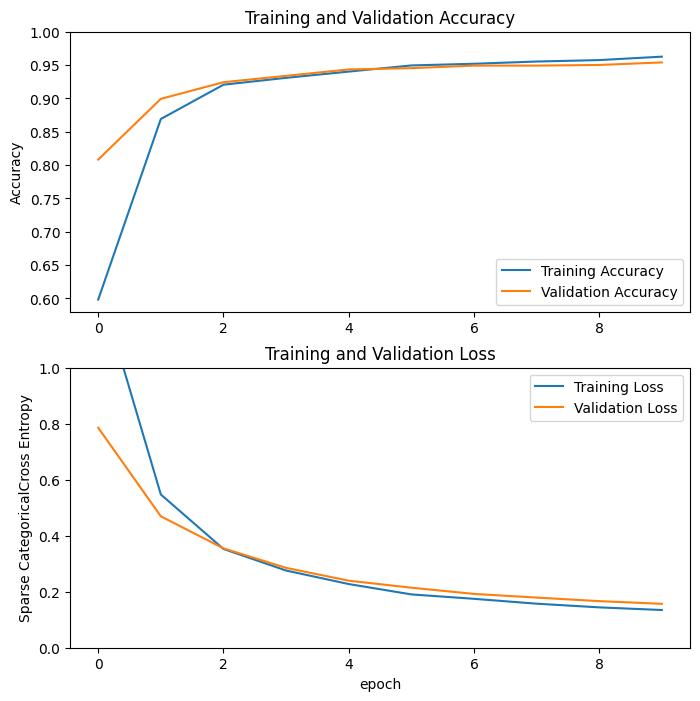

In [ ]:
# Learning Curve
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel("Accuracy")
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Sparse CategoricalCross Entropy')
plt.ylim([0, 1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## Evaluate Model after Transfer Learning

### Evaluate on Test Sets

In [ ]:
loss1, acc1 = model.evaluate(test_ds)

print("After Transfer Learning:\nTest Data:")
print(f"Loss: {loss1}\nAccuracy: {acc1}")

66/66 [==============================] - 21s 37ms/step - loss: 0.1332 - accuracy: 0.9693
After Transfer Learning:
Test Data:
Loss: 0.13316383957862854
Accuracy: 0.969348669052124


### Predict on Test Sets

In [ ]:
# Get first batch of testing datasets
img_b, label_b = test_ds.as_numpy_iterator().next()

In [ ]:
predictions = model.predict_on_batch(img_b)
p_i = predictions[0]
print("Class: Confidence Percent")
print(f"Label: {label_b[0]} => {class_name_list[label_b[0]]}")
print("=========================")
for indx, prob in enumerate(p_i):
  print(f"{class_name_list[indx]} : {(prob * 100):.2f} %")

Class: Confidence Percent
Label: 0 => Apple___Apple_scab
Apple___Apple_scab : 24.02 %
Apple___Black_rot : 0.51 %
Apple___Cedar_apple_rust : 56.38 %
Apple___healthy : 0.01 %
Blueberry___healthy : 0.02 %
Cherry___healthy : 0.14 %
Cherry___Powdery_mildew : 18.48 %
Corn___Cercospora_leaf_spot Gray_leaf_spot : 0.17 %
Corn___Common_rust : 0.03 %
Corn___healthy : 0.02 %
Corn___Northern_Leaf_Blight : 0.23 %


# Fine Tuning

In [ ]:
# Fine Tuning
base_model.trainable = True

In [ ]:
print(f"Number of layers in base model: {len(base_model.layers)}")

# Fine Tune from this layer onward
fine_tune_at = 100

# Freeze all layers before the `fine_tine_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in base model: 154


In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
# model.summary()
# len()
len(model.layers)

8

In [ ]:
len(model.trainable_variables)

56

## Train the Model

In [ ]:
fine_tune_epochs = 10
total_epochs = init_epochs + fine_tune_epochs

history_fine = model.fit(
    train_ds,
    epochs=total_epochs,
    initial_epoch=history.epoch[-1],
    validation_data=valid_ds,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3, mode="auto")
    ]
)

Epoch 10/20
522/522 [==============================] - 72s 84ms/step - loss: 0.1077 - accuracy: 0.9596 - val_loss: 0.0916 - val_accuracy: 0.9674
Epoch 11/20
522/522 [==============================] - 59s 79ms/step - loss: 0.0781 - accuracy: 0.9711 - val_loss: 0.0755 - val_accuracy: 0.9703
Epoch 12/20
522/522 [==============================] - 85s 129ms/step - loss: 0.0663 - accuracy: 0.9772 - val_loss: 0.0927 - val_accuracy: 0.9655
Epoch 13/20
522/522 [==============================] - 63s 82ms/step - loss: 0.0587 - accuracy: 0.9789 - val_loss: 0.0657 - val_accuracy: 0.9789
Epoch 14/20
522/522 [==============================] - 63s 85ms/step - loss: 0.0512 - accuracy: 0.9801 - val_loss: 0.0573 - val_accuracy: 0.9799
Epoch 15/20
522/522 [==============================] - 61s 79ms/step - loss: 0.0493 - accuracy: 0.9811 - val_loss: 0.0569 - val_accuracy: 0.9799
Epoch 16/20
522/522 [==============================] - 61s 81ms/step - loss: 0.0451 - accuracy: 0.9835 - val_loss: 0.0562 - val_a

In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history.history['val_loss']

[]

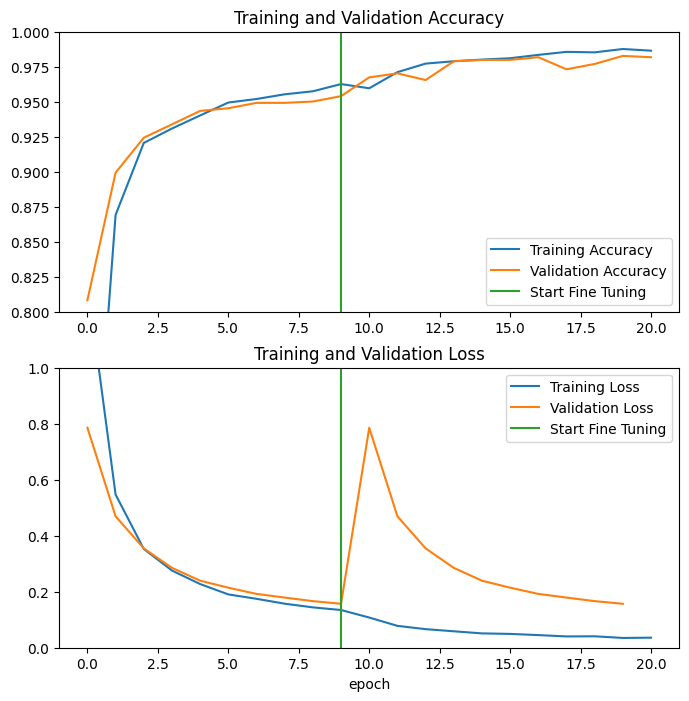

In [ ]:
plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([init_epochs - 1, init_epochs - 1],
         plt.ylim(), label="Start Fine Tuning")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim({0, 1.0})
plt.plot([init_epochs - 1, init_epochs - 1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.plot()

## Evaluate Model after Fine Tuning

### Evaluate on Test Sets

In [ ]:
loss1, acc1 = model.evaluate(test_ds)

print("After Fine Tuning:\nTest Data:")
print(f"Loss: {loss1}\nAccuracy: {acc1}")

66/66 [==============================] - 24s 57ms/step - loss: 0.0374 - accuracy: 0.9875
After Fine Tuning:
Test Data:
Loss: 0.03740522637963295
Accuracy: 0.9875478744506836


### Evaluate on Validation Sets

In [ ]:
loss2, acc2 = model.evaluate(valid_ds)
print("After Fine Tuning:\nValidation Data:")
print(f"Loss: {loss2}\nAccuracy: {acc2}")

66/66 [==============================] - 19s 36ms/step - loss: 0.0512 - accuracy: 0.9818
After Fine Tuning:
Validation Data:
Testing Loss: 0.051183946430683136
Testing Accuracy: 0.9817833304405212


# Testing Model Perfomance After Training
Testing Model Perfomance After Training (Transfer Learning and Fine Tuning)

## Evaluate Model Perfomance on test dataset

In [ ]:
predictions = model.predict_on_batch(img_b)
p_i = predictions[0]
print("Class: Confidence Percent")
print("Label: ", label_b[0])
print("=========================")
for indx, prob in enumerate(p_i):
  print(f"{class_name_list[indx]} : {prob * 100}")

Class: Confidence Percent
Label:  0
Apple___Apple_scab : 99.96755123138428
Apple___Black_rot : 1.395771676016011e-05
Apple___Cedar_apple_rust : 0.030332594178617
Apple___healthy : 1.5776115136478808e-08
Blueberry___healthy : 2.7043674916647775e-11
Cherry___healthy : 6.673043344562757e-05
Cherry___Powdery_mildew : 0.0017889193259179592
Corn___Cercospora_leaf_spot Gray_leaf_spot : 3.2566850904913736e-05
Corn___Common_rust : 1.2238189128765953e-06
Corn___healthy : 3.638373213821211e-08
Corn___Northern_Leaf_Blight : 0.0002208115802204702


In [ ]:
def sort_2_list(prim_list, second_list, reverse=False):
    combined_lists = list(zip(prim_list, second_list))
    s = sorted(combined_lists, key=lambda elm: elm[0], reverse=reverse)
    pl, sl = list(zip(*s))
    return list(pl), list(sl)

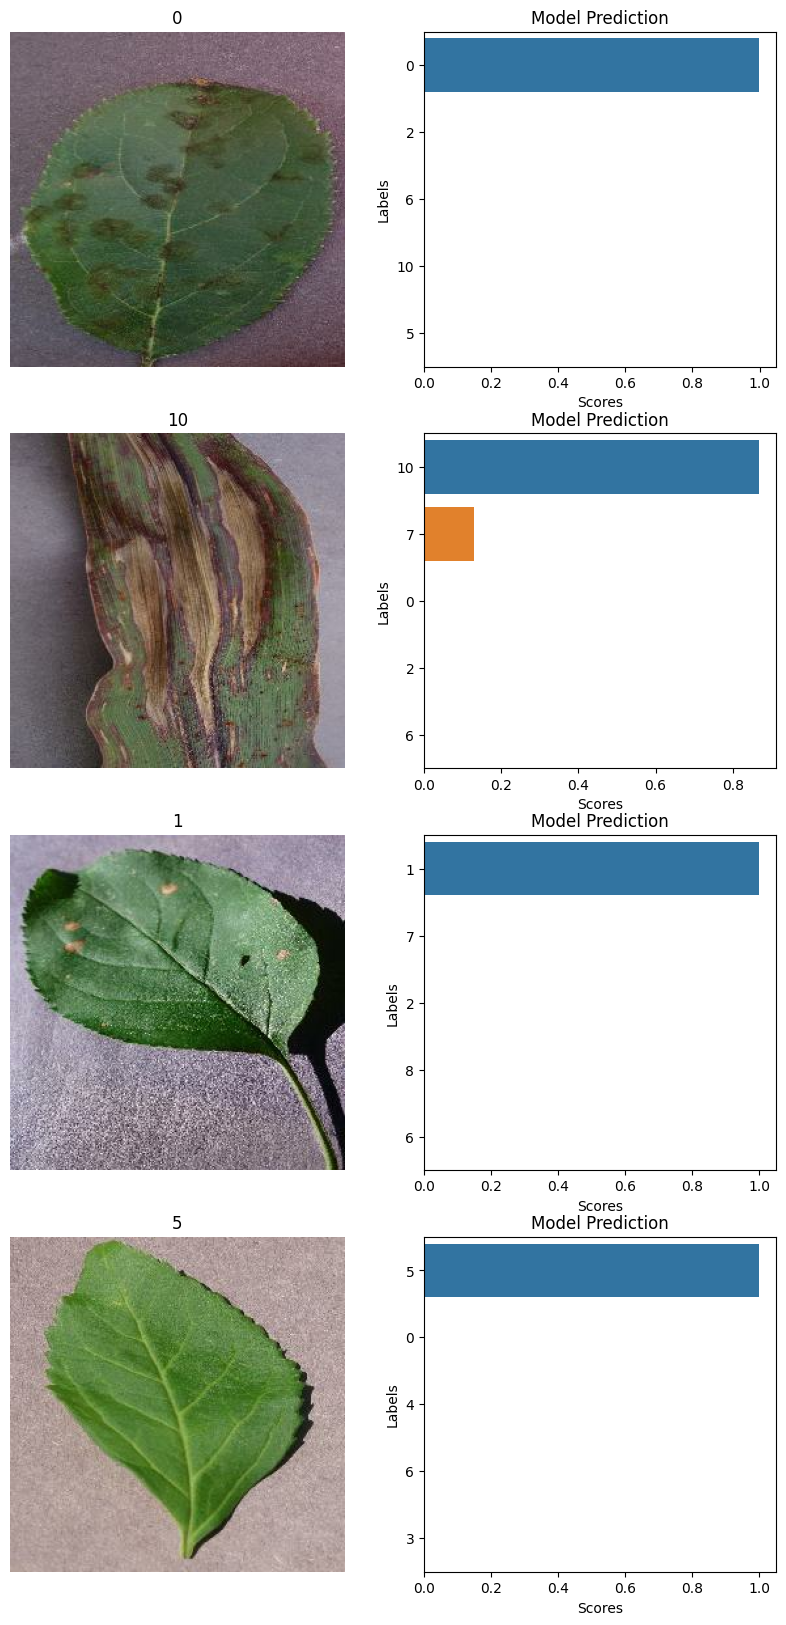

In [ ]:
plt.figure(figsize=(10, 20))

for i, j in enumerate(range(0, 4 * 2, 2)):
  prediction = predictions[i]
  plt.subplot(4, 2, j + 1)
  plt.imshow(img_b[i])
  plt.title(label_b[i])
  plt.axis("off")

  plt.subplot(4, 2, j + 2)
  plt.xlabel('Scores')
  plt.ylabel('Labels')
  plt.title("Model Prediction")

  sort_prediction, sort_label = sort_2_list(
      list(prediction),
      [i for i, _ in enumerate(prediction)],
      reverse=True)

  sns.barplot(x=sort_prediction[:5], y=sort_label[:5], orient='h', order=sort_label[:5])

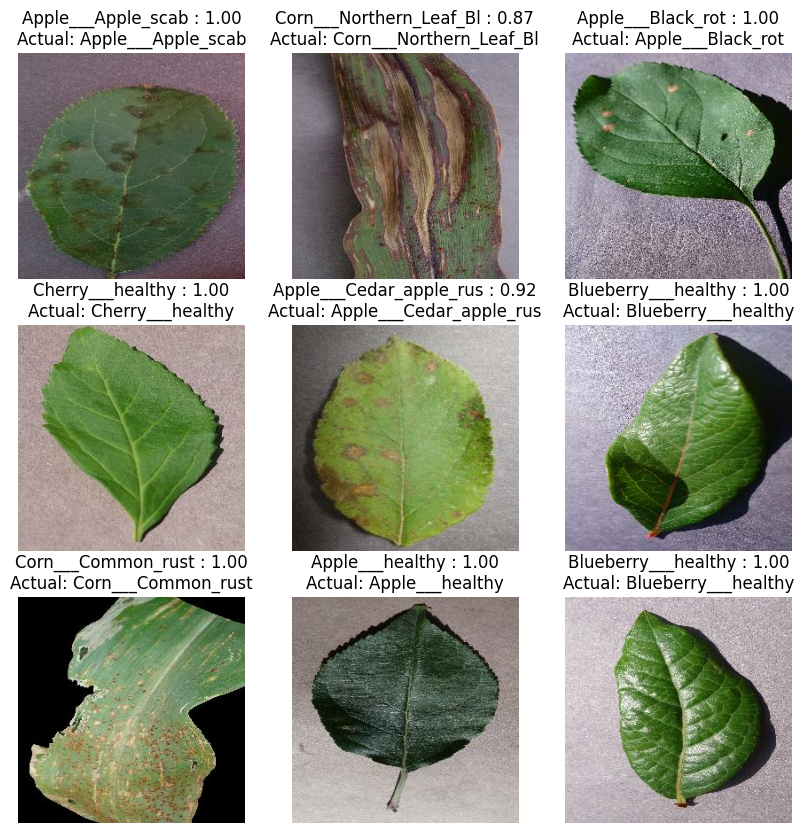

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
  plt.subplot(3, 3, i + 1)
  prediction = predictions[i]
  highest_score_indx = tf.math.argmax(prediction)
  plt.title(f"{class_name_list[highest_score_indx][:23]} : {prediction.max():.2f}\nActual: {class_name_list[label_b[i]][:23]}")
  plt.imshow(img_b[i])
  plt.axis("off")

In [ ]:
# Create Connfusion Matrix

def show_confusion_matrix(cm, labels):
  plt.figure(figsize=(10, 8))
  sns.heatmap(cm, xticklabels=labels, yticklabels=labels,
              annot=True, fmt='g')
  plt.xlabel("Prediction")
  plt.ylabel('Label')
  plt.show()


In [ ]:
# Map prediction score probabilities to absolute classes label
def prob_label(prediction_probabilities):
  prediction_labels = []
  for prediction_probability in prediction_probabilities:
    indx = tf.math.argmax(prediction_probability)
    prediction_labels.append(indx)
  return np.array(prediction_labels)

Predicted Classs: 
 [ 0 10  1  5  2  4  8  3  4  0  9  7  4  3 10  0]
Actual Class: 
 [ 0 10  1  5  2  4  8  3  4  0  9  7  4  3 10  0]


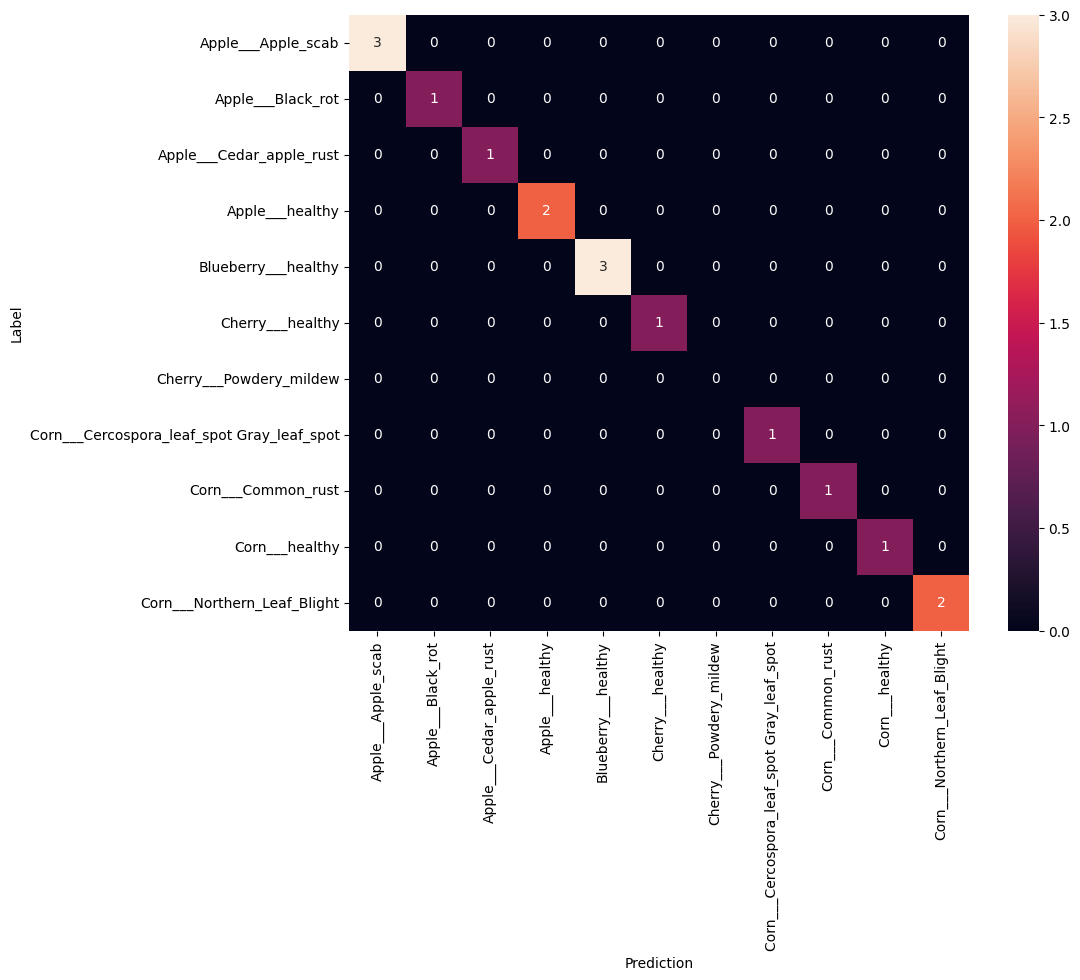

Predicted Classs: 
 [ 0 10  1  5  2  4  8  3  4  0  9  7  4  3 10  0]
Actual Class: 
 [ 0 10  1  5  2  4  8  3  4  0  9  7  4  3 10  0]


In [ ]:
# Map prediction score probabilities to absolute classes label
a_predictions = []
for prediction in predictions:
  indx = tf.math.argmax(prediction).numpy()
  a_predictions.append(indx)

print(f"Predicted Classs: \n", np.array(a_predictions))
print("Actual Class: \n", label_b)

# Confusion Matrix of First Batch of testset
confusion_mtx = tf.math.confusion_matrix(labels=label_b, predictions=prob_label(predictions), num_classes=class_num)
show_confusion_matrix(confusion_mtx, class_name_list)

print(f"Predicted Classs: \n", np.array(prob_label(predictions)))
print("Actual Class: \n", label_b)

## Predict on Test datasets Batches

In [ ]:
"""Return (predicition, actual_label)"""
def get_full_batch_prediction(ds):
  # Prediction an all test_dataset
  predictions_list = []
  actual_label_list = []
  # Iterate over batches in ds
  for img_batch, label_batch in ds:
      predictions_batch = model.predict_on_batch(img_batch)
      predictions_list.append(predictions_batch)
      actual_label_list.append(label_batch)
  # Concatenate predictions from all batches
  return (
      tf.concat(predictions_list, axis=0),
      tf.concat(actual_label_list, axis=0),
      )

In [ ]:
# (img_b, label_b)
label_b.shape

(16,)

Predicted Classs: 
 [ 3  8 10 ...  0  3  9]
Actual Class: 
 tf.Tensor([ 3  8 10 ...  0  3  9], shape=(1044,), dtype=int64)


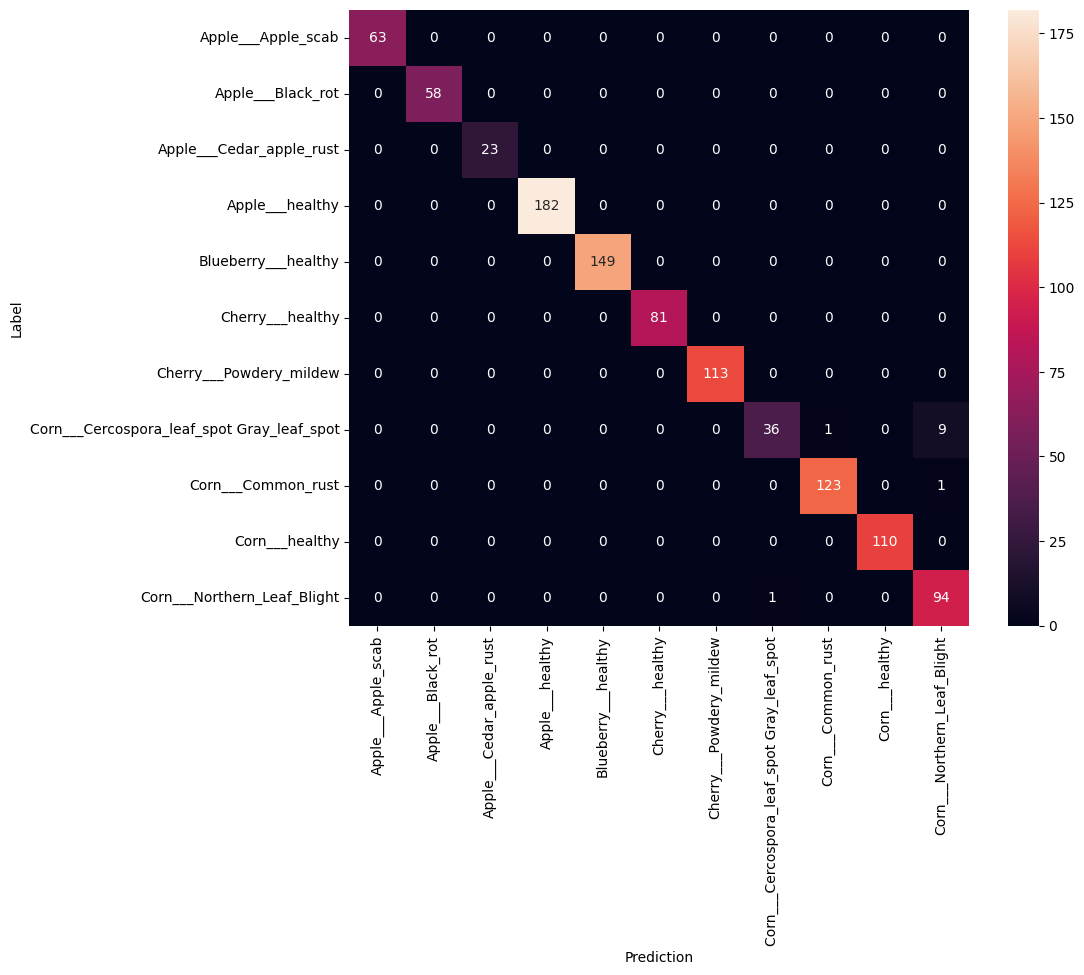

In [ ]:
# Confusion Matrix of all test set
m = get_full_batch_prediction(test_ds)
all_pred_label, all_target_label = prob_label(m[0]), m[1]

print(f"Predicted Classs: \n", np.array(all_pred_label))
print("Actual Class: \n", all_target_label)

confusion_mtx = tf.math.confusion_matrix(labels=all_target_label, predictions=all_pred_label, num_classes=class_num)
show_confusion_matrix(confusion_mtx, class_name_list)

# Saved Model

In [ ]:
saved_model_location = os.path.join("/content/drive", "MyDrive", "MyModel")
saved_model_name = 'crop_disease_mobileNetV2'

if not os.path.isdir(saved_model_location):
  print(f"Creating Directory: {saved_model_location}")
  os.mkdir(saved_model_location)

In [ ]:
# # Saved Mode
model.save(os.path.join(saved_model_location, f"{saved_model_name}.keras"))

In [ ]:
# # Load Saved Model
# model = tf.keras.models.load_model(os.path.join(saved_model_location, f"{saved_model_name}.keras"))

## Evaluate Load Model

In [ ]:
# # Evaluate Model with Testing Set

# # Get Prediction of testing set
# predictions = model.predict(test_ds)
# p_i = predictions[0]
# print("Class: Confidence Percent")
# print("Label: ", label_b[0])
# print("=========================")
# for indx, prob in enumerate(p_i):
#   print(f"{class_name_list[indx]} : {prob * 100}")

In [ ]:
# # Evaluate Model with Testing Set

# # Get Prediction of testing set
# img_b, label_b = test_ds.as_numpy_iterator().next()

# predictions = model.predict_on_batch(img_b)
# p_i = predictions[0]
# print("Class: Confidence Percent")
# print("Label: ", label_b[0])
# print("=========================")
# for indx, prob in enumerate(p_i):
#   print(f"{class_name_list[indx]} : {prob * 100}")